<a href="https://colab.research.google.com/github/moustafa-7/Flood-Fill-Algoirth-Cell-Counter/blob/master/DFS_Flood_Fill_Algorithm_cell_counter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
im = cv2.imread('/content/drive/My Drive/image1.tif')


In [0]:
im[:,:,2] = 0

In [0]:
im[:,:,0] = im[:,:,0]*3

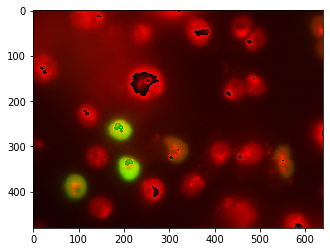

In [263]:
plt.imshow(im)

In [264]:
cv2.imwrite("filtered_img.png",im)

True

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 

img = Image.open('filtered_img.png')
# img.show() 
img.save('Cells.png', 'PNG')

grey = img.convert('L')
grey.save('Cellsgrey.png', 'PNG')

y=Image.open('Cellsgrey.png')
# y.show()
bthresh = y.point(lambda x: 255 if x >21 else 0)
bthresh.save('Cellsgreythreshold100.png', 'PNG')
v=Image.open('Cellsgreythreshold100.png')


# c=Image.open('Cellsgreythreshold100.png')

from PIL import Image
pil_im = Image.open('Cellsgreythreshold100.png')
pil_imgray = pil_im.convert('LA')
pil_im.show()

pixmap = np.array(list(pil_imgray.getdata(band=0)), float)
pixmap.shape = (pil_imgray.size[1], pil_imgray.size[0])
# plt.imshow(img)



from skimage.transform import rescale, resize, downscale_local_mean
pixmap = resize(pixmap, (pixmap.shape[0] // 4, pixmap.shape[1] // 4),
                       anti_aliasing=True)



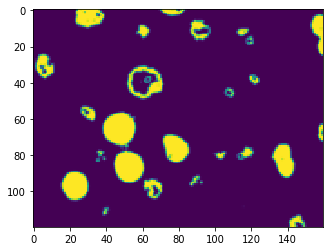

In [319]:
plt.imshow(pixmap)


In [0]:
import matplotlib

matplotlib.image.imsave("down_sampled.png", pixmap)

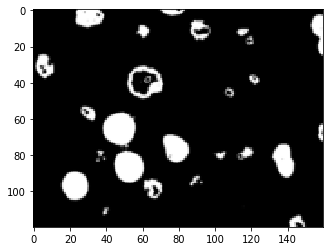

In [321]:
plt.imshow(pixmap, cmap = "gray")

In [322]:
pixmap.shape

(120, 160)

In [0]:
def DFS(x, y, visited, n, m,img,check_counter):
  if (x >= n or y >= m):
    return

  if(x < 0 or y < 0):
    return
  
  if(visited[x,y] == 1):
    return

  if(img[x,y] == 0):
      return

  visited[x,y] = 1
  check_counter.append(1)
  # img[x,y] = 0

  DFS(x-1, y-1, visited, n, m,img,check_counter)
  DFS(x-1, y, visited, n, m,img,check_counter)
  DFS(x-1, y+1, visited, n, m,img,check_counter)
  DFS(x, y-1, visited, n, m,img,check_counter)
  DFS(x, y+1, visited, n, m,img,check_counter)
  DFS(x+1, y-1, visited, n, m,img,check_counter)
  DFS(x+1, y, visited, n, m,img,check_counter)
  DFS(x+1, y+1, visited, n, m,img,check_counter)

In [325]:


visited = np.zeros(pixmap.shape)
(n,m) = pixmap.shape
counter = 0



for i in range(n):
  for j in range(m):
    tt = pixmap[i,j]
    if(pixmap[i,j]==255):
      check_counter = []   
      DFS(i,j,visited,n,m,pixmap,check_counter)
      
      if sum(check_counter) >=10:
        counter += 1

      pixmap[i,j] = 255

print(counter)

9
